### Smoothed Bathymetry without SVB - Domain 05 

Longer domain to the north and extended to the west to avoid flattening the bottom at the shelf north of Point Conception because it generates inernal waves at the artificial step.

In this bathymetry we REMOVE SEBASTIAN VIZCAINO BAY and flatten the topograpby at the open boundaries so that there are no topography gradients across the open boundaries.

Data from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Domain 5 is bounded by

* north: 35.3 N 
* south: 27.0 N
* west: -122.0 W
* east: -114.0 W

Other considerations
* Bottom depth flattened to -5000 m. 
* Land set to 0 m. - fixed small puddles on land.
* Erased some weird artifacts from the measurement tracks.
* No Ojo de Liebre lagoon
* flattened bathymetry from 29.7N to 35.3N

Grid
* Horizontal resolution: $\Delta$lon -0.0156 deg (~1.42 km S-1.55 km N) and $\Delta$lat 0.0136 (1.503 km N and S)
* nx=512, ny=612, nz=100, 

OPEN BOUNDARIES: North, West and South

In [1]:
from cartopy import crs as ccrs
import cartopy as cpy
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp
%matplotlib inline

In [2]:
nc_file = '../../data/gebco_SVB/gebco_2020_n36.0_s26.0_w-122.0_e-113.5.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (2400,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (2040,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_pa

In [3]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

In [4]:
for ii,loni in zip(range(len(lon)),lon):
    print(ii,loni)

0 -121.99791666666667
1 -121.99375
2 -121.98958333333334
3 -121.98541666666667
4 -121.98125
5 -121.97708333333333
6 -121.97291666666666
7 -121.96875
8 -121.96458333333334
9 -121.96041666666667
10 -121.95625000000001
11 -121.95208333333333
12 -121.94791666666666
13 -121.94375
14 -121.93958333333333
15 -121.93541666666667
16 -121.93125
17 -121.92708333333334
18 -121.92291666666667
19 -121.91875
20 -121.91458333333333
21 -121.91041666666666
22 -121.90625
23 -121.90208333333334
24 -121.89791666666667
25 -121.89375000000001
26 -121.88958333333333
27 -121.88541666666666
28 -121.88125
29 -121.87708333333333
30 -121.87291666666667
31 -121.86875
32 -121.86458333333334
33 -121.86041666666667
34 -121.85625
35 -121.85208333333333
36 -121.84791666666666
37 -121.84375
38 -121.83958333333334
39 -121.83541666666667
40 -121.83125000000001
41 -121.82708333333333
42 -121.82291666666666
43 -121.81875
44 -121.81458333333333
45 -121.81041666666667
46 -121.80625
47 -121.80208333333334
48 -121.79791666666667


1044 -117.64791666666667
1045 -117.64375000000001
1046 -117.63958333333333
1047 -117.63541666666666
1048 -117.63125
1049 -117.62708333333333
1050 -117.62291666666667
1051 -117.61875
1052 -117.61458333333334
1053 -117.61041666666667
1054 -117.60625
1055 -117.60208333333333
1056 -117.59791666666666
1057 -117.59375
1058 -117.58958333333334
1059 -117.58541666666667
1060 -117.58125000000001
1061 -117.57708333333333
1062 -117.57291666666666
1063 -117.56875
1064 -117.56458333333333
1065 -117.56041666666667
1066 -117.55625
1067 -117.55208333333334
1068 -117.54791666666667
1069 -117.54375
1070 -117.53958333333333
1071 -117.53541666666666
1072 -117.53125
1073 -117.52708333333334
1074 -117.52291666666667
1075 -117.51875000000001
1076 -117.51458333333333
1077 -117.51041666666666
1078 -117.50625
1079 -117.50208333333333
1080 -117.49791666666667
1081 -117.49375
1082 -117.48958333333334
1083 -117.48541666666667
1084 -117.48125
1085 -117.47708333333333
1086 -117.47291666666666
1087 -117.46875
1088 -11

In [5]:
## Set domain corners
lon1 = 0
lon2 = 1919
lat1 = 240
lat2 = 2232

## Flatten out bottom at 5000 m, land at 0 m
elev[elev > 0] = 0
elev[elev < -5000] = -5000

## Flatten out NE corner in the Gulf of California
elev[lat2-640:lat2+3, lon2-550:lon2+3] = 0
elev[lat2-1110:lat2-640, lon2-300:lon2+3] = 0
elev[lat2-1375:lat2-640, lon2-200:lon2+3] = 0
elev[lat2-760:lat2+3, lon2-430:lon2+3] = 0

## Remove Ojo de Liebre lagoon
elev[lat1+145:lat1+180, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+210, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+225, lon2-75:lon2+3] = 0


<ipython-input-6-0a629fdb3a2a>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2], cmap=cmo.cm.deep_r)
<ipython-input-6-0a629fdb3a2a>:5: UserWarning: No contour levels were found within the data range.
  cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])


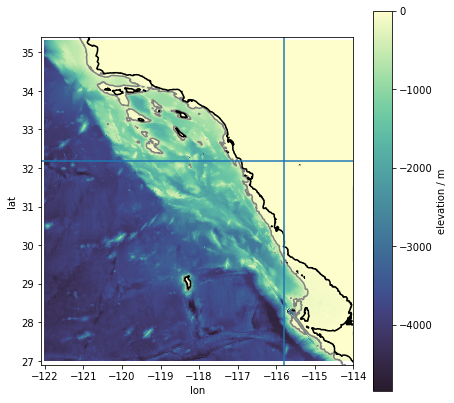

In [6]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2], cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
ax.axhline(lat[lat2-750])
ax.axvline(lon[lon2-430])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim(-122.1,-114)
ax.set_ylim(26.9,35.4)
ax.set_aspect(1)

**Map above**: Colormesh of proposed domain 1 with land set to 0 m and bottom depth flattened at -5000 m (max depth found is 5083 m).  Black contour at 0 m depth, gray contour at -250 m depth (shelf break). There are some weird features I need to erase. For example, the track lines (I think they come from the measurement tracks) in the "trench" between the main continental shelf, and multiple coastline features on the southeast coast of the bay that I won't be able to resolve.    

In [7]:
nx = 512
ny = 612

lon_vect = np.round(np.linspace(-122.0,-114.0,nx+1), decimals=5)
lat_vect = np.round(np.linspace(27.0,35.3,ny+1), decimals=5)

f_interp = sci_interp.interp2d(lon,lat,elev)

In [8]:
bathy = f_interp(lon_vect,lat_vect)

<ipython-input-9-23efb1a3f1b0>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
<ipython-input-9-23efb1a3f1b0>:5: UserWarning: No contour levels were found within the data range.
  ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])


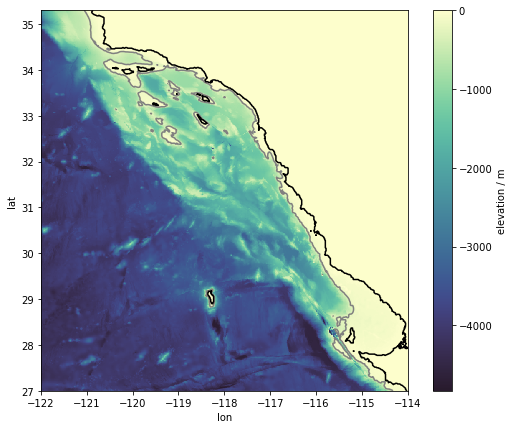

In [9]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
ax.contour(lon_vect,lat_vect, -bathy, colors='0.5', levels=[250])
ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

In [10]:
def smooth(array):
    filtered = (array[:-1,1:]+array[1:,1:]+array[1:,:-1]+array[1:,1:])/4
    return(filtered)

In [11]:
smooth_bathy = (smooth(bathy))

# Add walls 
smooth_bathy[:,-1] = 0 # east
#smooth_bathy[0,:] = 0 # south
#smooth_bathy[-1,:] = 0 # north
#smooth_bathy[:,0] = 0 # west


<ipython-input-12-49f080971bfa>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
<ipython-input-12-49f080971bfa>:5: UserWarning: No contour levels were found within the data range.
  ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
<ipython-input-12-49f080971bfa>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc1 = ax1.pcolormesh(lon_vect[1:], lat_v

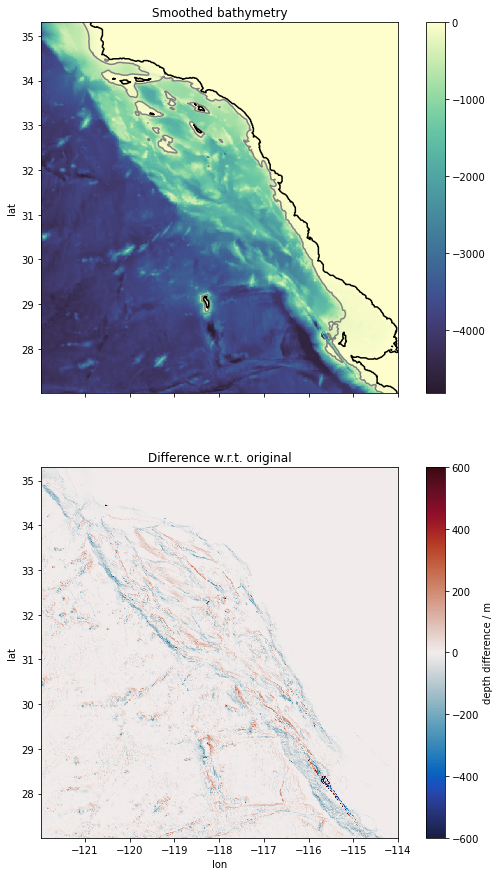

In [12]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,15), sharex=True)
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax)
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])

pc1 = ax1.pcolormesh(lon_vect[1:], lat_vect[1:],
                     smooth_bathy-bathy[1:,1:], 
                     cmap=cmo.cm.balance, vmin=-600, vmax=600)
cb = plt.colorbar(pc1, ax=ax1)

cb.set_label('depth difference / m')
ax1.set_xlabel('lon')
ax.set_ylabel('lat')
ax1.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax1.set_title('Difference w.r.t. original')
ax.set_aspect(1)
ax1.set_aspect(1)

### Final clean up

Remove 1-cell islands and puddles on land

In [13]:
smooth_bathy[358,116]=smooth_bathy[358,117]
# uff, there's lots to fix...

<ipython-input-14-cae07c48f53b>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)


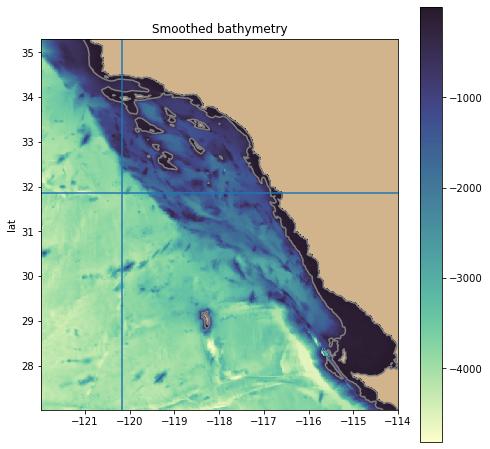

In [14]:
fig, (ax) = plt.subplots(1,1,figsize=(8,8), sharex=True)
mask_smooth = np.ma.masked_values(smooth_bathy,0)
mask = np.ma.getmask(mask_smooth)
depths = np.ma.masked_array(smooth_bathy, mask=mask)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)
ax.axvline(lon_vect[117])
ax.axhline(lat_vect[359])

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[0,250])
#ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
ax.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax.set_aspect(1)


## Remove the bay

First try: Take shelf slope at A and propagate it south along the shelf break isobath for every j-index (N-S index) up to Punta Euguenia.

The depth at A1 is -152.80 m and at A2 is -2.19 m
The lat at A1 is 29.81


<ipython-input-15-424118d7809b>:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)


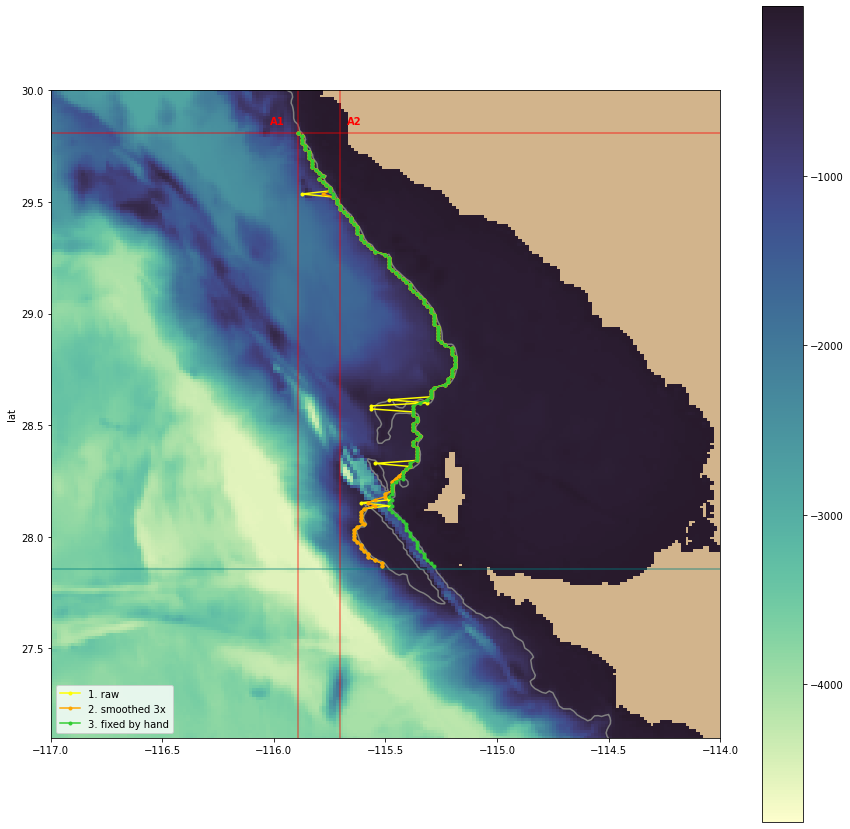

In [15]:
isobath = 250 # shelf break depth

# Initial and final points at A to get the slope
aj = 177+30
ai1 = 328+63
ai2 = 340+63
print('The depth at A1 is %1.2f m and at A2 is %1.2f m' %(depths[aj,ai1],depths[aj,ai2]))
print('The lat at A1 is %1.2f' %(lat_vect[aj]))

# Punta Eugenia j index
pej = 63

# For each y index, find the x index of the point closest to 250 m isobath.
raw_iind = np.argmin(np.abs(depths[pej:aj,ai1-20:]+isobath), axis=1)

iind=raw_iind.copy()

# Smooth out jumps in 3 passes
for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) >= 10:
        iind[ii+1] = max(iind[ii],iind[ii+1])#int((iind[ii]+iind[ii+1])/2)

for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) > 4:
        iind[ii+1] = int((iind[ii]+iind[ii+1])/2)

for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) > 3:
        iind[ii+1] = int((iind[ii]+iind[ii+1])/2)

# Fix the rest by hand
iind_fixed = iind.copy()
iind_fixed[:1] = iind_fixed[:1]+1
iind_fixed[:2] = iind_fixed[:2]+14
iind_fixed[2:3] = iind_fixed[2:3]+15
iind_fixed[3] = iind_fixed[3]+16
iind_fixed[4:7] = iind_fixed[4:7]+16
iind_fixed[7] = iind_fixed[7]+16
iind_fixed[8] = iind_fixed[8]+17
iind_fixed[9] = iind_fixed[9]+17
iind_fixed[10] = iind_fixed[10]+16
iind_fixed[11] = iind_fixed[11]+16
iind_fixed[12] = iind_fixed[12]+15
iind_fixed[13] = iind_fixed[13]+14
iind_fixed[14] = iind_fixed[14]+12
iind_fixed[15] = iind_fixed[15]+12
iind_fixed[16] = iind_fixed[16]+11
iind_fixed[17] = iind_fixed[17]+10
iind_fixed[18] = iind_fixed[18]+9
iind_fixed[19] = iind_fixed[19]+7
iind_fixed[20] = iind_fixed[20]+5
iind_fixed[21] = iind_fixed[21]+6
iind_fixed[22] = iind_fixed[22]+5
iind_fixed[23] = iind_fixed[23]+1
iind_fixed[24] = iind_fixed[24]+2
iind_fixed[28] = iind_fixed[28]+1
iind_fixed[29] = iind_fixed[29]+2
iind_fixed[30] = iind_fixed[30]+1
iind_fixed[123] = iind_fixed[123]+3

# Add slope (depths) from A at each iind
depths_noSVB = depths.copy()
for ii, ind in zip(range(pej,aj),iind_fixed):
    depths_noSVB[ii,ind:ind+(ai2-ai1)]=depths[ii,ai1:ai2]

# Plot to check
fig, (ax) = plt.subplots(1,1,figsize=(15,15), sharex=True)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)

ax.axvline(lon_vect[ai2], color='r', alpha=0.5)
ax.axvline(lon_vect[ai1], color='r', alpha=0.5)
ax.axhline(lat_vect[aj], color='r', alpha=0.5)
ax.text(lon_vect[342+63],lat_vect[180+30],'A2', color='r', fontweight='bold')
ax.text(lon_vect[320+63],lat_vect[180+30],'A1', color='r', fontweight='bold')
ax.axhline(lat_vect[pej], color='teal', alpha=0.5)

ax.plot(lon_vect[raw_iind+ai1-20],lat_vect[pej+1:aj+1],'.-', color='yellow', label='1. raw')
ax.plot(lon_vect[iind+ai1-20],lat_vect[pej+1:aj+1],'.-', color='orange', label='2. smoothed 3x')
ax.plot(lon_vect[iind_fixed+ai1-20],lat_vect[pej+1:aj+1],'.-', color='limegreen', label='3. fixed by hand')

ax.contour(lon_vect[1:],lat_vect[1:], -depths, colors='0.5', levels=[0,250])
ax.set_ylabel('lat')
ax.set_aspect(1)
ax.set_xlim(-117, -114)
ax.set_ylim(27.1,30)
ax.legend()

Once we have the indices of the shelf break, we propagate the shelf profile from A south up to Punta Eugenia:

<ipython-input-16-525eb0058e20>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep, vmin=-1000, vmax=0)


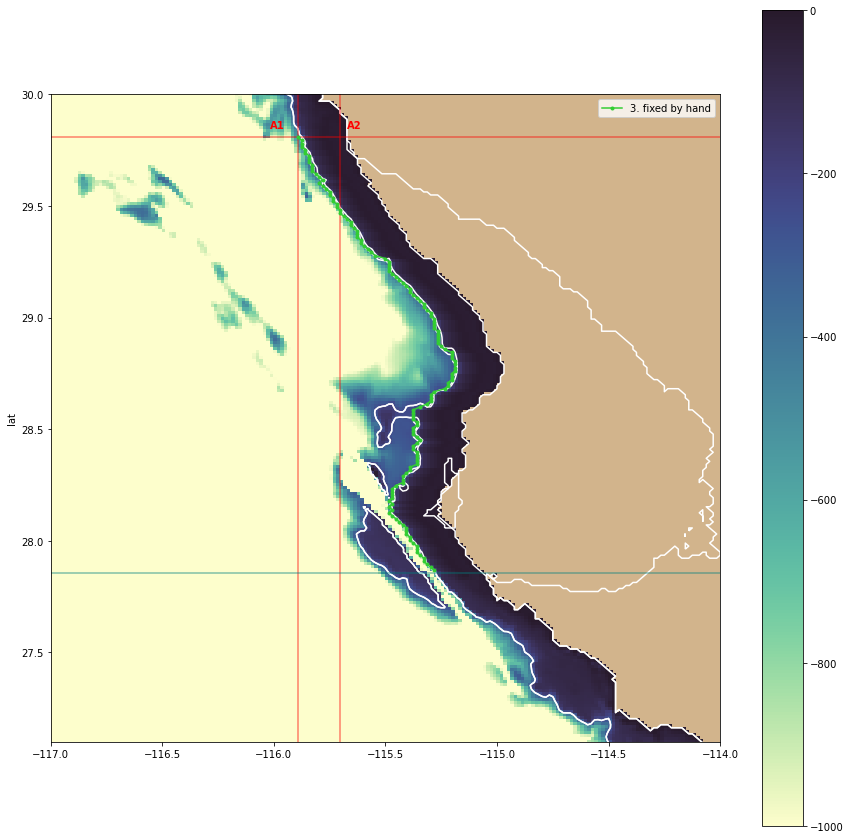

In [16]:
# Add slope (depths) from A at each iind
bathy_noSVB = smooth_bathy.copy()
for ii, ind in zip(range(pej-1,aj),iind_fixed):
    bathy_noSVB[ii,ind+ai1-20:ind+ai1-20+(ai2+61-ai1)]=smooth_bathy[aj,ai1:ai2+61]

# Fill out missing bits in the bay
bathy_noSVB[pej-6:pej,iind_fixed[0]+ai1-3:]=0.0
bathy_noSVB[pej:pej+60,iind_fixed[0]+ai1:]=0.0

# Plot to check
mask_bat = np.ma.masked_values(bathy_noSVB,0)
mask_noSVB = np.ma.getmask(mask_bat)
depths_noSVB = np.ma.masked_array(bathy_noSVB, mask=mask_noSVB)

fig, (ax) = plt.subplots(1,1,figsize=(15,15), sharex=True)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep, vmin=-1000, vmax=0)
cb = plt.colorbar(pc, ax=ax)

ax.axvline(lon_vect[ai2], color='r', alpha=0.5)
ax.axvline(lon_vect[ai1], color='r', alpha=0.5)
ax.axhline(lat_vect[aj], color='r', alpha=0.5)
ax.text(lon_vect[342+63],lat_vect[180+30],'A2', color='r', fontweight='bold')
ax.text(lon_vect[320+63],lat_vect[180+30],'A1', color='r', fontweight='bold')
ax.axhline(lat_vect[pej], color='teal', alpha=0.5)

ax.plot(lon_vect[iind_fixed+ai1-20],lat_vect[pej+1:aj+1],'.-', color='limegreen', label='3. fixed by hand')
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='w', levels=[0,250])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='w', levels=[0,250])

ax.set_ylabel('lat')
ax.set_aspect(1)
ax.set_xlim(-117, -114)
ax.set_ylim(27.1,30)
ax.legend()

<ipython-input-17-c3b7d7073297>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
<ipython-input-17-c3b7d7073297>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
<ipython-input-17-c3b7d7073297>:10: UserWarning: No contour levels were found within the data range.
  ax.contour(lon_vect[1:],lat_vect[1:], -smooth

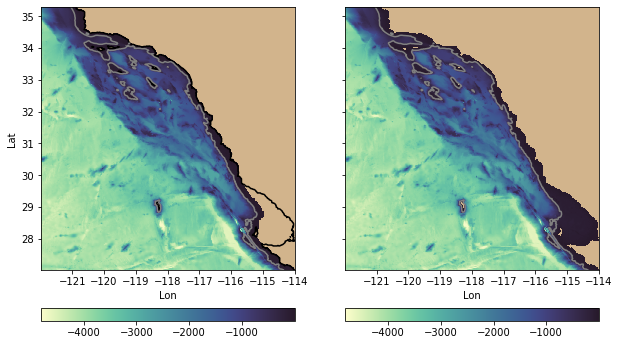

In [17]:
# Plot to check
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax, orientation='horizontal',pad=0.1)
pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb2 = plt.colorbar(pc2, ax=ax2, orientation='horizontal',pad=0.1)

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', linewidth=1, levels=[0])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='0.5', levels=[250])
ax2.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
ax2.set_xlabel('Lon')
ax.set_aspect(1)
ax2.set_aspect(1)


### Flatten topo at open boundaries

<ipython-input-18-ec3745872604>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
<ipython-input-18-ec3745872604>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
<ipython-input-18-ec3745872604>:18: UserWarning: No contour levels were found within the data range.
  ax.contour(lon_vect[1:],lat_vect[1:], -smoo

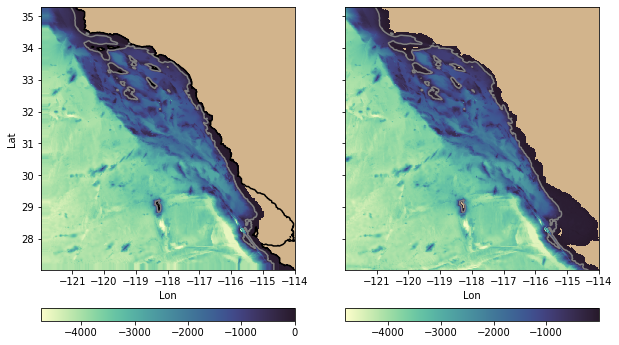

In [18]:
for ii in range(15):
    bathy_noSVB[:,ii] = bathy_noSVB[:,15]

for ii in range(15):
    bathy_noSVB[ii,:] = bathy_noSVB[15,:]

depths_noSVB = np.ma.masked_array(bathy_noSVB, mask=mask_noSVB)

# Plot to check
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax, orientation='horizontal',pad=0.1)
pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb2 = plt.colorbar(pc2, ax=ax2, orientation='horizontal',pad=0.1)

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', linewidth=1, levels=[0])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='0.5', levels=[250])
ax2.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
ax2.set_xlabel('Lon')
ax.set_aspect(1)
ax2.set_aspect(1)


### Flatten and extend topography from 29.7 all the way to the northern boundary:

<ipython-input-24-994a71bb4a99>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax1.pcolormesh(lon_vect[1:],lat_vect[1:], bathy_ctw, cmap=cmo.cm.deep)
<ipython-input-24-994a71bb4a99>:12: UserWarning: No contour levels were found within the data range.
  ax1.contour(lon_vect[1:],lat_vect[1:], -bathy_ctw, colors='k', linewidth=1, levels=[0])
<ipython-input-24-994a71bb4a99>:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax1.contour(lon_vect[1:],lat_vect[1:], -bathy_ctw, colors='k', linewidth=1, levels=[0])


(-2560.034964640001, 0.0)

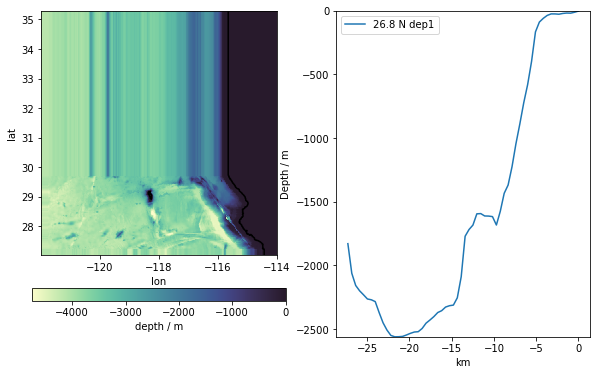

In [24]:
lat_ind = 200
bathy_ctw = bathy_noSVB.copy()
bathy_ctw[lat_ind:, :] = bathy_ctw[lat_ind,:]
coast_ind = int(np.argmax(smooth_bathy[lat_ind,:].data))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,6))

ax1.set_facecolor('tan')
pc = ax1.pcolormesh(lon_vect[1:],lat_vect[1:], bathy_ctw, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax1, orientation='horizontal',pad=0.1)

ax1.contour(lon_vect[1:],lat_vect[1:], -bathy_ctw, colors='k', linewidth=1, levels=[0])
ax1.set_ylabel('Lat')
ax1.set_xlabel('Lon')
ax1.set_aspect(1)

cb.set_label('depth / m')
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)

# Cross-shelf bathymetry profiles
dist1 = 111*(lon[:coast_ind]-lon[coast_ind-1])
dep1 = smooth_bathy[lat_ind,:coast_ind]

ax2.plot(dist1[-60:],dep1[-60:], label='%1.1f N dep1' %lat[lat_ind])

ax2.set_xlabel('km')
ax2.set_ylabel('Depth / m')
ax2.legend()
ax2.set_ylim(np.min(dep1[-60:]),0)

### Binary file

In [25]:
# Build grid spacing vectors dx and dy 
delx = lon_vect[1:]-lon_vect[:-1]
dely = lat_vect[1:]-lat_vect[:-1]
dx = np.append(delx, [delx[-1]], axis=0) # This is not the best way to do this
dy = np.append(dely, [dely[-1]], axis=0)

In [26]:
print(f" dy={dy[1]}, dx={dx[1]}")

 dy=0.013560000000001793, dx=0.015630000000001587


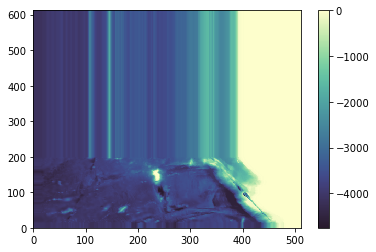

In [27]:
bathy_fname = '512x612/domain5_512x612_noSVB_straight_bat.bin'
dx_fname = '512x612/domain5_512x612_straight_dx.bin'
dy_fname = '512x612/domain5_512x612_straight_dy.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(dx_fname,mode='wb')
dx.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(dy_fname, mode='wb')
dy.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(bathy_fname, mode='wb')
dd=bathy_ctw
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd, cmap=cmo.cm.deep_r)
plt.colorbar()
plt.show()

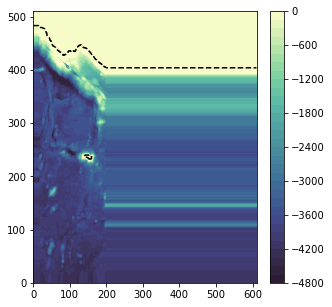

In [28]:
# Check it is read correctly
cc=np.fromfile(bathy_fname, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[nx,ny],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF, 40, cmap=cmo.cm.deep_r)
pc2 = ax.contour(bF, levels=[-10], colors='k')

plt.colorbar(pc,ax=ax)
